# ELG 5255 Applied Machine Learning Summer 2021
# Assignment 5 (MLP)
---
##**By Group 31 :**
*   Abdelrahman Othman     [aothm031@uOttawa.ca](aothm031@uOttawa.ca)
*   Heba Hassan            [hhass021@uOttawa.ca](hhass021@uOttawa.ca)
*   Aliaa Ahmed            [aahme256@uOttawa.ca](aahme256@uottawa.ca)
---



Apply Multi Layer Perceptron (MLP) on the provided dataset by using activation functions listed below. Use the
given parameters. Run MLP 10 times for each case, plot runtime vs. accuracy with average line as shown in
below.
> (Number of hidden layer: 1, Learning rate: 0.1, maximum iteration:1000 )

1. Relu
2. Sigmoid
3. Tanh

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf
from statistics import mean
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import activations
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#train = pd.read_csv("/content/drive/MyDrive/datasets/DUMD_train.csv")
#test = pd.read_csv("/content/drive/MyDrive/datasets/DUMD_test.csv")

In [ ]:
train = pd.read_csv("/content/DUMD_train.csv")
test = pd.read_csv("/content/DUMD_test.csv")

In [ ]:
x_train = train.iloc[:,0:5].to_numpy()
y_train = train.iloc[:,5].to_numpy()
x_test = test.iloc[:,0:5].to_numpy()
y_test = test.iloc[:,5].to_numpy()

## One Hot Encoding

In [ ]:
# y of train data
print("Before Encoding:\n", y_train)
y_train_encoded = to_categorical(y_train)
print("\nAfter Encoding:\n",y_train_encoded)
print("\nShape = (numberOfSamples, numOfUniqueLabels) = ", y_train_encoded.shape)

Before Encoding:
 [0 3 2 1 2 2 1 3 3 1 2 3 0 1 1 2 1 2 2 1 1 3 0 1 3 2 1 1 3 1 1 1 0 3 2 2 0
 2 2 3 1 1 1 2 3 1 2 2 1 0 0 2 3 0 3 0 1 1 1 1 2 2 1 1 0 1 2 2 2 0 3 1 1 2
 1 1 3 2 1 2 2 2 3 1 1 3 3 2 2 0 2 3 1 2 3 3 1 1 2 1 2 0 3 2 2 1 1 2 1 0 2
 2 1 0 1 3 3 1 2 2 2 3 2 2 2 3 3 0 3 2 3 1 3 1 2 3 1 2 1 1 3 2 3 1 3 3 1 1
 1 3 1 3 2 3 2 3 2 1 1 2 0 0 2 0 1 3 2 2 3 2 2 3 2 2 1 3 1 1 2 2 1 2 3 2 1
 1 2 1 1 3 2 3 2 1 2 3 2 1 2 2 2 1 3 2 2 3 0 1 3 3 1 2 1 3 0 2 0 3 2 3 0 3
 0 1 3 1 1 1 2 1 2 0 1 2 3 1 2 3 2 2 0 3 0 0 2 2 3 0 2 0 3 0 3 0 1 3 3 1 3
 1 2 1 2 3 0 3 0 3 2 3 1 3 3 2 3 0 1 2 1 0 1 2 1 2 3 1 0 1 2 1 2 1 1 1 2 2
 3 1 2 3 3 0 1 2 3 1 3 0 3 1 1 3 1 2 1 1 1 1 3 3 1 2 2]

After Encoding:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Shape = (numberOfSamples, numOfUniqueLabels) =  (323, 4)


In [ ]:
# y of test data
print("Before Encoding:\n", y_test)
y_test_encoded = to_categorical(y_test)
print("\nShape = (numberOfSamples, numOfUniqueLabels) = ", y_test_encoded.shape)

Before Encoding:
 [2 2 2 0 3 3 2 3 1 2 2 1 3 0 3 1 2 3 1 2 1 1 2 2 2 1 2 3 2 3 3 3 2 3 1 3 1
 0 1 1 2 3 1 2 1 3 1 3 0 1 2 3 1 3 1 0 1 1 2 3 3 1 0 2 0 0 0 0 3 1 1 1 1 2
 2 2 1 0 3 1]

Shape = (numberOfSamples, numOfUniqueLabels) =  (80, 4)


## Model Overview

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer (Dense)          (None, 100)               600       
_________________________________________________________________
Output (Dense)               (None, 4)                 404       
Total params: 1,004
Trainable params: 1,004
Non-trainable params: 0
_________________________________________________________________
None 




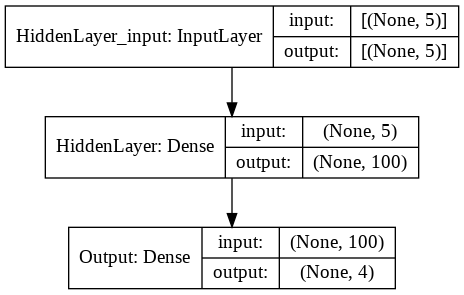

In [ ]:
activation_fn = activations.sigmoid

mlp = keras.models.Sequential([
  Dense(100, activation= activation_fn, name="HiddenLayer",  input_shape=(5,)),
  Dense(4, activation= activation_fn, name="Output")
])
print(mlp.summary(),"\n\n")
keras.utils.plot_model(mlp, "Assignment#5_MLP#1_with_shape_info.png", show_shapes=True)

In [ ]:
tf.keras.backend.clear_session()

# Q1

## Sigmoid

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
h_total_train=[]
h_total_val=[]
total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 95.13 %


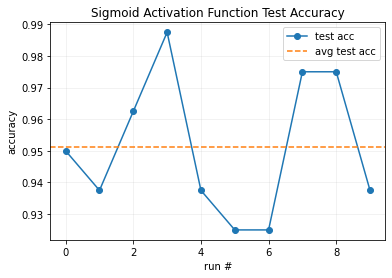

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--")
plt.legend(['test acc', 'avg test acc'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Relu

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
total_acc_relu=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.relu, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_relu.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Relu avg test acc: %.2f %%'%(mean(total_acc_relu)*100))

Relu avg test acc: 94.88 %


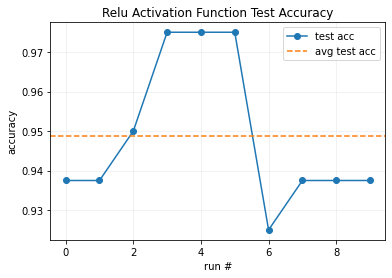

In [ ]:
plt.plot(total_acc_relu, marker = "o")
plt.axhline(mean(total_acc_relu), color = 'tab:orange', ls = "--")
plt.legend(['test acc', 'avg test acc'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Relu Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Tanh

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
total_acc_tanh=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.tanh, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_tanh.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Tanh avg test acc: %.2f %%'%(mean(total_acc_tanh)*100))

Tanh avg test acc: 97.00 %


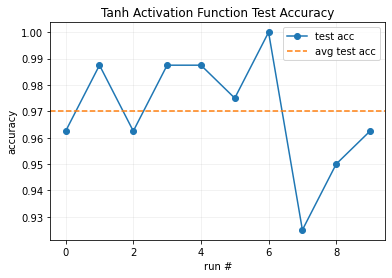

In [ ]:
plt.plot(total_acc_tanh, marker = "o")
plt.axhline(mean(total_acc_tanh), color = 'tab:orange', ls = "--")
plt.legend(['test acc', 'avg test acc'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Tanh Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

In [ ]:
baseline1 = max(mean(total_acc_sig), mean(total_acc_relu), mean(total_acc_tanh))
baseline1*100

96.99999988079071

##Final Results are:
Sigmoid avg test acc: 96.63 % </br>
Relu avg test acc: 97.25 % </br>
Tanh avg test acc: 96.62 %



---



# Q2

 Choose the activation function that provides highest average accuracy value in Q1. Try different number of
hidden layers as given below. Run MLP 10 times for each case, plot runtime vs. accuracy with average line. Plot
the best average accuracy value from Q1 as baseline performance.

 **Number of hidden layers:**
*   1
*   2
*   3
*   4

## 1 Hidden Layer
Using ***Sigmoid*** activation fn

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 97.00 %


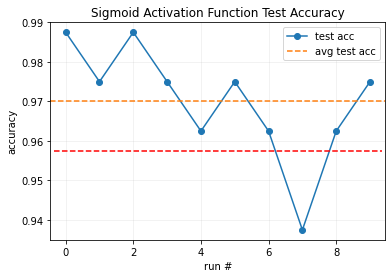

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--")
plt.axhline(aliaa, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)
plt.legend(['test acc', 'avg test acc'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## 2 Hidden Layer

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer2"),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 49.63 %


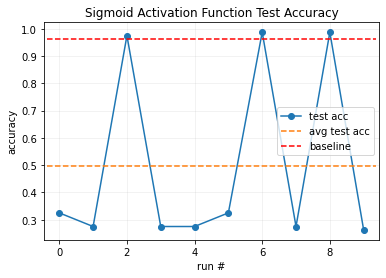

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## 3 Hidden Layers

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer2"),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer3"),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 29.50 %


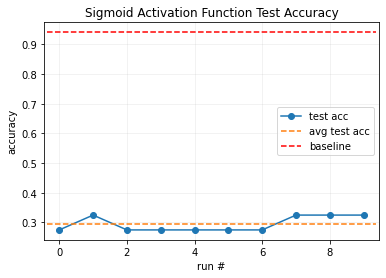

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## 4 Hidden Layers

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

In [ ]:
total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer2"),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer3"),
    Dense(100, activation= activations.sigmoid, name="HiddenLayer4"),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 27.00 %


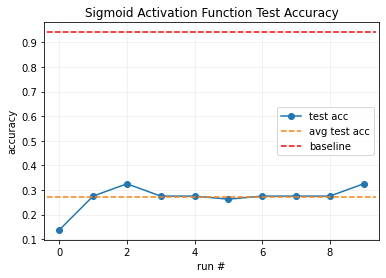

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)



---



# Q3

Use the number of hidden layers that achieves highest average accuracy in Q2. In this step, try 3 different
learning rate values from the given interval. Run MLP 10 times for each case, plot runtime vs. accuracy with
average line and updated baseline performance.
1. Learning rate: 0.08 - 0.3
2. Train your model with final parameters. Display the training curve and confusion matrix with accuracy
value.

## Learning rate - 0.1 - baseline
Using ***Sigmoid*** activation fn with ***1 hidden*** layer

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.1)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))
baseline = mean(total_acc_sig)

Sigmoid avg test acc: 96.75 %


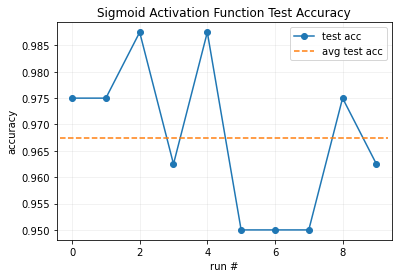

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Learning rate - 0.08
Using ***Sigmoid*** activation fn with ***1 hidden*** layer

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.08)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 96.87 %


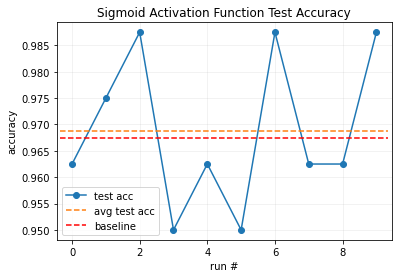

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Learning rate - 0.2
Using ***Sigmoid*** activation fn with ***1 hidden*** layer

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.2)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 96.63 %


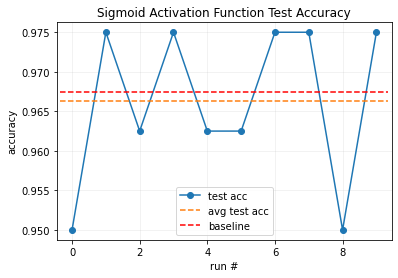

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Learning rate - 0.3
Using ***Sigmoid*** activation fn with ***1 hidden*** layer

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.3)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 96.63 %


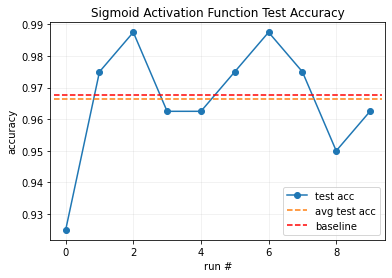

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

## Train model With final parameters
Using ***Sigmoid*** activation fn with ***1 hidden*** layer and learning rate of ***0.08***

In [ ]:
# reset all state generated by Keras.
tf.keras.backend.clear_session()

total_acc_sig=[]
number_of_runs=10
for i in range(number_of_runs):
  # reset all state generated by Keras.
  tf.keras.backend.clear_session()

  # define the model
  mlp = keras.models.Sequential([
    Dense(100, activation= activations.sigmoid, name="HiddenLayer",  input_shape=(5,)),
    Dense(4, activation= activations.softmax, name="Output")
  ])

  # set Learning Rate
  opt = keras.optimizers.Adam(learning_rate=0.08)

  # Compile
  mlp.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

  h = mlp.fit(x_train, y_train_encoded, epochs=1000, validation_split=0.25, verbose=0,
            callbacks= [EarlyStopping(monitor='val_accuracy',
                                      mode='auto',
                                      verbose=0,
                                      patience = 150,
                                      restore_best_weights = True)])
  
  total_acc_sig.append(mlp.evaluate(x_test,y_test_encoded, verbose=0)[1])

In [ ]:
print('Sigmoid avg test acc: %.2f %%'%(mean(total_acc_sig)*100))

Sigmoid avg test acc: 95.87 %


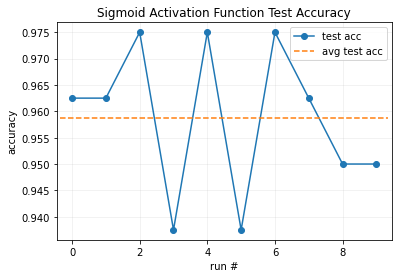

In [ ]:
plt.plot(total_acc_sig, marker = "o")
plt.axhline(mean(total_acc_sig), color = 'tab:orange', ls = "--", xmin = 0.01, xmax = 0.99)
#plt.axhline(baseline, color = 'red', ls = "--", xmin = 0.01, xmax = 0.99)

plt.legend(['test acc', 'avg test acc', 'baseline'])
plt.xlabel("run #")
plt.ylabel("accuracy")
plt.title("Sigmoid Activation Function Test Accuracy")
plt.grid(alpha = 0.2)

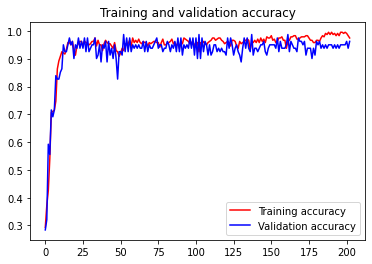

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Confusion matrix

In [ ]:
predicted = mlp.predict_classes(x_test, verbose = 0)
print("predicted: ",predicted, "\n")
print("y_true: ",y_test)

predicted:  [2 2 2 0 3 3 2 3 1 2 2 1 2 0 2 1 2 3 1 2 1 1 2 2 2 1 2 3 2 3 3 3 2 3 1 3 1
 0 1 1 1 3 1 2 1 3 1 3 0 1 2 3 1 3 1 0 1 1 2 3 3 1 0 2 1 0 0 0 3 1 1 1 1 2
 2 2 1 0 3 1] 

y_true:  [2 2 2 0 3 3 2 3 1 2 2 1 3 0 3 1 2 3 1 2 1 1 2 2 2 1 2 3 2 3 3 3 2 3 1 3 1
 0 1 1 2 3 1 2 1 3 1 3 0 1 2 3 1 3 1 0 1 1 2 3 3 1 0 2 0 0 0 0 3 1 1 1 1 2
 2 2 1 0 3 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
cm

array([[10,  1,  0,  0],
       [ 0, 26,  0,  0],
       [ 0,  1, 21,  0],
       [ 0,  0,  2, 19]])

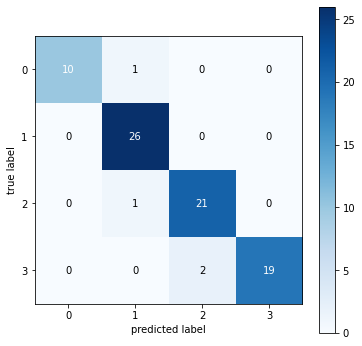

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, figsize=(6,6))
plt.show()